# <center>Diamonds</center>
----


## The Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle("../data/diamonds.pkl")

---

## How this started

Years ago, I was tooling around on, I think, either the [UVA Darden Graduate School of Business](https://www.darden.virginia.edu/) or the [Harvard Business School](https://www.hbs.edu/Pages/default.aspx) website and came across a dataset called "Sarah gets a diamond". Apparently, it's a fairly well known dataset amongst the MBA crowd and you can still [find it for sale](https://hbsp.harvard.edu/product/UV0869-PDF-ENG) on the web. I saved it for future use because I thought it was easily graspable and pretty good for a regression model. 

At least, I thought this was the same dataset. In hindsight, I don't think it is because that dataset currently says it has the prices for 6000 diamonds and this has considerably more at 219,704 rows. So far as I'm aware, this is the largest dataset of diamonds prices available.

If you're interested in developing a bit of domain knowledge, the [history of how diamonds are graded](https://www.thediamondauthority.org/the-diamond-grading-system/) is interesting but, unlike the links for the terms below which are of immediate relevance, I recommend you read it later.

## Background information to get you talking like an expert in no time

### The 4Cs -- the main variables that determine value, according to the diamond industry:

# <center>Cut, Color, Clarity, and Caret Weight</center>

In [3]:
df

,cut,color,clarity,caret_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,...,8.66,M,STK,unknown,None,unknown,unknown,unknown,unknown,1210692
219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,...,5.71,TK,XTK,unknown,None,Green,unknown,None,Fancy Light,1292500
219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,...,10.20,TN,M,unknown,None,unknown,unknown,unknown,unknown,1315496
219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,N,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


### Rather than go though all the details for all the columns, I'll summarize and provide links
* `clarity` refers the inclusions (i.e., [internal flaws](https://4cs.gia.edu/en-us/diamond-clarity/)) in the diamonds seen though a jewelers loupe or microscope. [Fewer and smaller are better](https://www.diamonds.pro/education/clarity/).
* `cut_quality` refers the [GIA Cut Grading System](https://www.gemsociety.org/article/gias-new-diamond-cut-grading-system/) which was developed in 2005 and is de facto standard. 
* `color` Clear diamonds are graded D-Z. The [higher letters more yellowish](https://www.lumeradiamonds.com/diamond-education/diamond-color) but are [often better values](https://www.diamonds.pro/education/color/) since color is hard to determine once in a ring.
* `polish` and `symmetry` are what you would expect.
* `eye-clean` refers to the blemishes or inclusions can see with a the naked eye. [There are 10 grades](https://www.diamonds.pro/education/eye-clean-diamonds/).
* `culet_size` is the size of the circle you'd see if you looked straight down. [None is ideal](https://www.diamonds.pro/education/diamond-culet/) because it affects the amount of light that gets reflected. 
* `fancy_color_` columns have to do with colored diamonds. Formerly, extremely rare but now common, popular, and almost always lab grown.
* `fluor` columns refer to the effect of long wave UV light. [According to GIA](https://4cs.gia.edu/en-us/blog/understanding-diamond-fluorescence/) 25-35% have it; for ~10% of those it's noticeable to an expert.
* `lab` is the grading lab. The big three are GIA, IGI and HRD . Each diamond gets a lab certificate that [looks like this](https://www.i-diamants.com/en/diamond-certificates-gia-igi-hrd.html,00026).
* `cut` refers to one of the 10 or so most [common diamond cuts](https://www.lumeradiamonds.com/diamond-education/diamond-shape). This dataset has an additional one called the 'Cushion Modified'.
![Diamond Shapes](../images/Diamond_shapes.png)

## Preliminary EDA

#### Getting a sense of the numeric data

In [4]:
df.shape

(219703, 25)

In [5]:
df.describe()

,caret_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


I found a few things interesting here: Comparing the mean, the median, and the 75% we see this is heavily skewed both with lots of small diamonds but also with few large and expensive stones. That brings us to ...

## Outliers, (part I)

#### Outliers are normally defined as:
<br>

<center>${\large[}Q_{1}-k(Q_{3}-Q_{1}), Q_{3}+k(Q_{3}-Q_{1}){\large ]}$ </center>
                
                     
But in this case it turns out there are a number of large diamonds and they're mostly evenly dispersed in size.

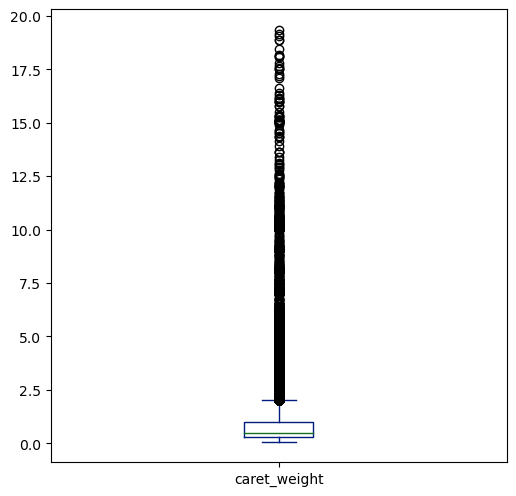

In [6]:
sns.set_palette(palette='dark', n_colors=14)
df['caret_weight'].plot(kind='box',figsize=(20,20),subplots=True,layout=(3,3))

plt.show()

Let's look at them separately starting with the teeny, tiny little elephants in the room: melee diamonds

## Outliers (part 2)
<br>

Melee diamonds are generally defined as diamonds that are less than or equal to .2 carats. They're used to proved a lot of refection without a lot of size. As you can see on the next three charts (they're the ones to the left of pink vertical line) they make up a negligible amount of the total.

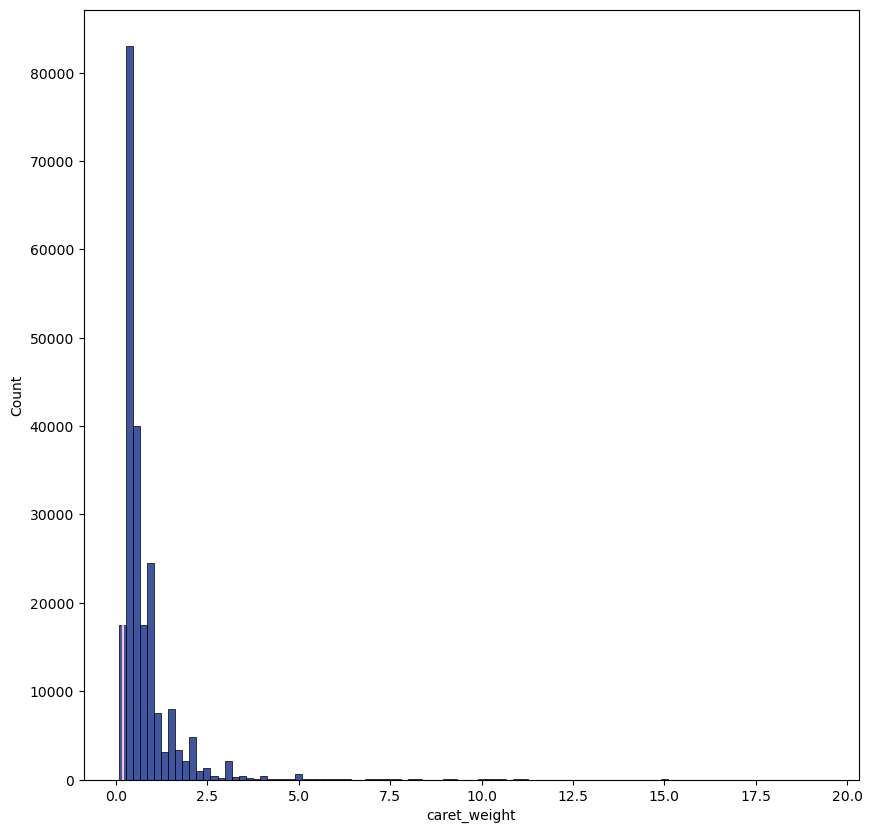

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(data=df, x="caret_weight", bins=100)
plt.axvline(.2, 0.0, 0.2,  c='pink')

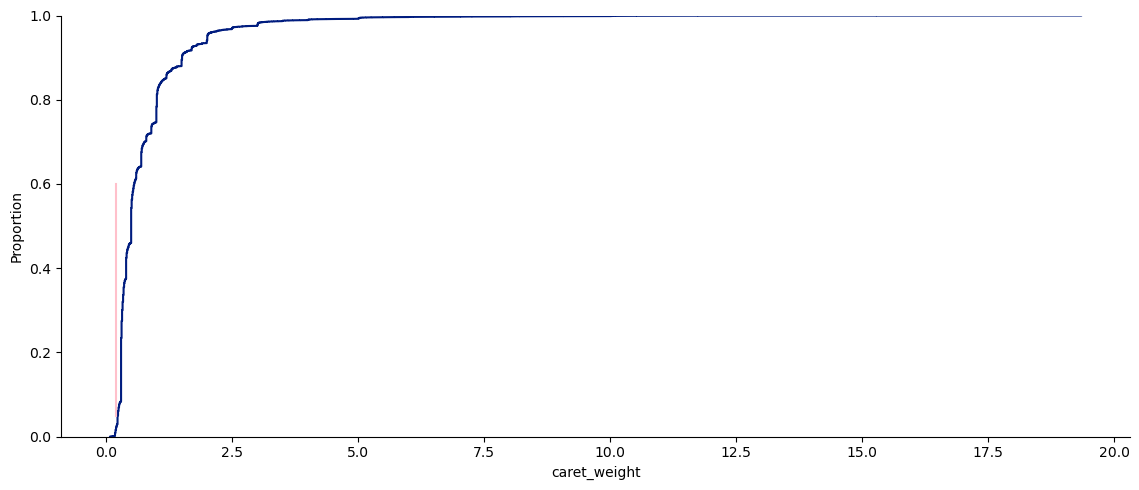

In [8]:
sns.displot(df, x="caret_weight", aspect=2.3,  kind="ecdf")
plt.axvline(.2, 0.05, 0.6, c='pink')

Additionally, [this lady](https://slate.com/human-interest/2013/01/dear-prudence-is-my-engagement-ring-diamond-too-small.html) has a 1/6 carat (.166) stone. Admittedly, it's an N of 1 but this is a world-wide market and not just a US market.

You would think there there would be some stones we could rule out. The smallest size `df['size'].min()` is .08 carets and if we take everything at `df.loc[df['size'] <= .2]` and below that only 4805 rows or about 2% of the total number of entries in database. If we her stone is the smallest and we'll eliminate anything at .15 carat or below, we would eliminate a total of 263 rows.

But the real answer, at least for the lower end, is best found statistically. From the box and whiskers in Cell 5 above, there aren't any outliers at the lower end. 

## Outliers (part 3)

But what about the upper end? Shouldn't we eliminate them? Like, who the heck is going to have a 18 carat ring?

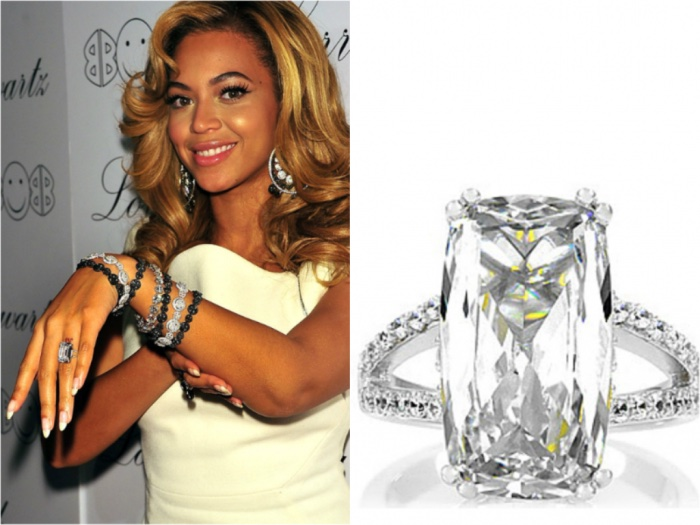

##### Oh . . . her. 
##### Wow. That's . . . that's quite impressive. Oh, and those tiny ones going around the band -- those are melee stones.

But, setting aside the impressiveness of that ring, there are some reasons why not to remove outliers in this case. Namely, the data is extremely unlikely to be due an error in collection, and it's not clear if the outliers will affect the model results or not. Some estimators are highly sensitive to outliers; others aren't. But transforming the data would handle it either way.


---

# EDA -- starting with the basics

Sticking with the Cut, Color, Clarity, and Caret Weight order above ...

## Cut

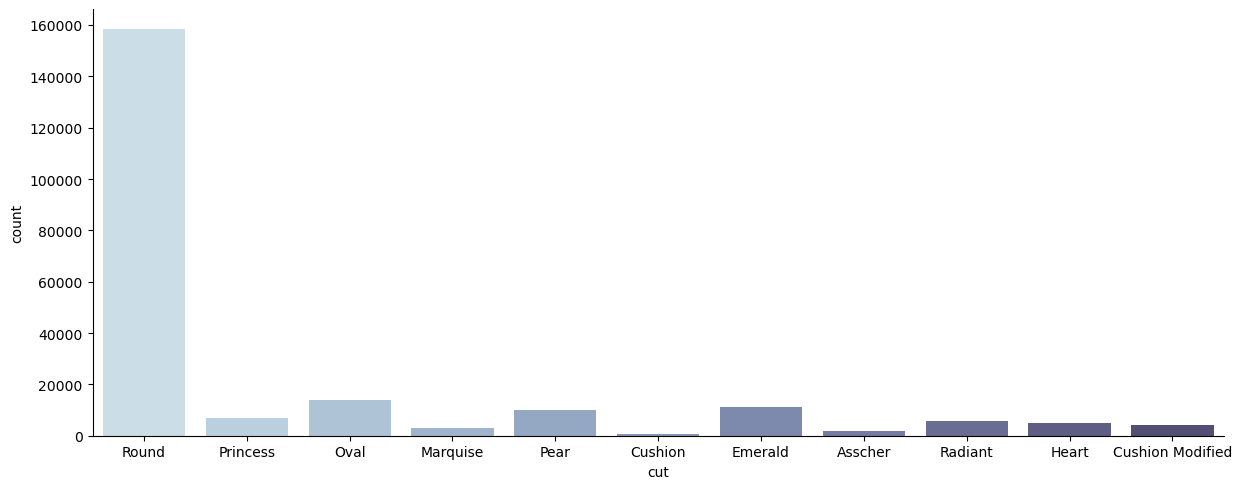

In [9]:
sns.set_palette(palette="ch:s=.25,rot=-.25", n_colors=14)
shapes = ['Round', 'Princess', 'Oval', 'Marquise', 'Pear', 'Cushion', 'Emerald', 'Asscher', 'Radiant', 'Heart', 'Cushion Modified']

sns.catplot(x='cut', data=df, kind='count', order=shapes, aspect=2.5)

#df['shape'].value_counts()

I think it's fair to say it's no surprise that round diamonds make up the vast majority. While we can't get the reason from the dataset, the short answer is twofold: round diamonds give the most sparkle per caret but also there issues of taste and expectation.
Here's that graphic again to help in visualizing the shapes
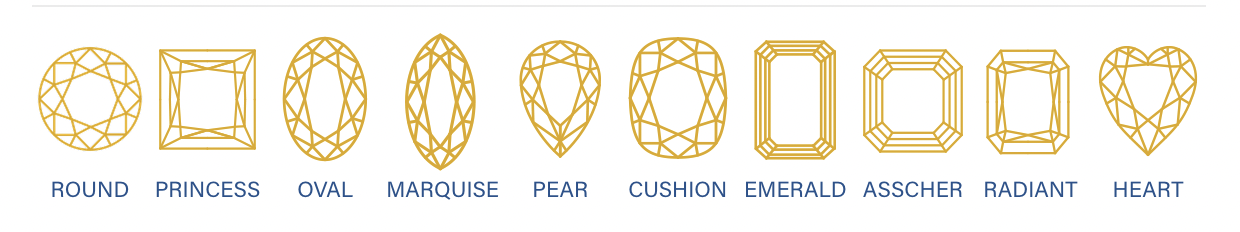

In [13]:
round_cut = df['cut'].value_counts()['Round']
pricess_cut = df['cut'].value_counts()['Princess']
oval_cut = df['cut'].value_counts()['Oval']
marquise_cut = df['cut'].value_counts()['Marquise']
pear_cut = df['cut'].value_counts()['Pear']
cushion_cut = df['cut'].value_counts()['Cushion']
emerald_cut = df['cut'].value_counts()['Emerald']
asscher_cut = df['cut'].value_counts()['Asscher']
radiant_cut = df['cut'].value_counts()['Radiant']
heart_cut = df['cut'].value_counts()['Heart']
cushion_modified_cut = df['cut'].value_counts()['Cushion Modified']

print(f"Round diamonds are {round(round_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Princess diamonds are {round(pricess_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Oval diamonds are {round(oval_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Marquise diamonds are {round(marquise_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Pear diamonds are {round(pear_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Cushion diamonds are {round(cushion_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Emerald diamonds are {round(emerald_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Asscher diamonds are {round(asscher_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Radiant diamonds are {round(radiant_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Heart diamonds are {round(heart_cut/219704*100, 1)}% of all diamonds in the set")
print(f"Cushion Modified diamonds are {round(cushion_modified_cut/219704*100, 1)}% of all diamonds in the set")

Round diamonds are 72.1% of all diamonds in the set
Princess diamonds are 3.2% of all diamonds in the set
Oval diamonds are 6.3% of all diamonds in the set
Marquise diamonds are 1.3% of all diamonds in the set
Pear diamonds are 4.5% of all diamonds in the set
Cushion diamonds are 0.2% of all diamonds in the set
Emerald diamonds are 5.0% of all diamonds in the set
Asscher diamonds are 0.8% of all diamonds in the set
Radiant diamonds are 2.6% of all diamonds in the set
Heart diamonds are 2.2% of all diamonds in the set
Cushion Modified diamonds are 1.8% of all diamonds in the set


## Color

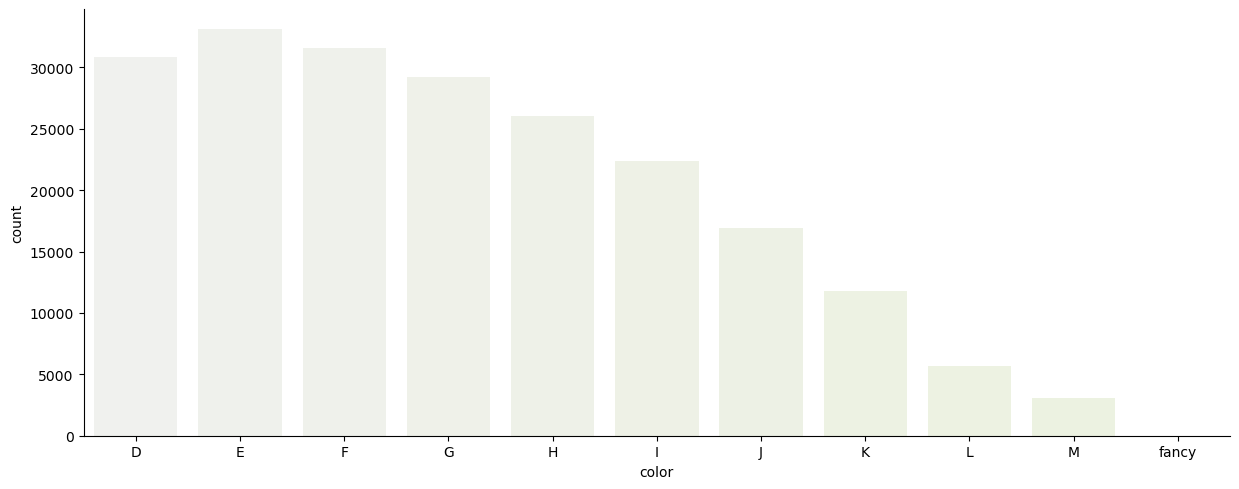

In [14]:
sns.set_palette(palette="light:#edf5dc", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'fancy']
sns.catplot(x='color', data=df, kind='count', order=colors, aspect=2.5)

#df['color'].value_counts()d

I just want to point out that getting the column colors to mimic the diamond colors by color grade is not particularly easy.

## Clarity
Most diamonds in this data set are of good or higher quality. This is probably an indicator that highly flawed diamonds are mostly used for commercial processes

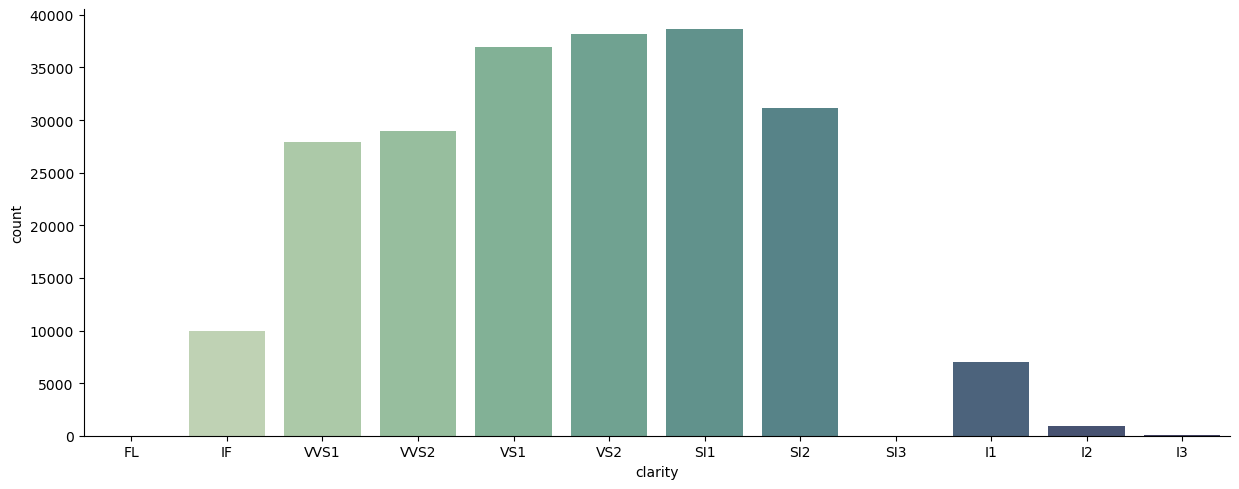

In [15]:
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=14)

clarities = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'SI3', 'I1', 'I2', 'I3']
sns.catplot(x='clarity', data=df, kind='count', order=clarities, aspect=2.5)

#df['clarity'].value_counts()

There are 10 SI3 stones and no Flawless stones in this dataset.

**Next iteration though EDA** -- group the clarity ratings (e.g., VS1-VS2 or I1-I3) and see what, if anything, we notice from plotting the results against, carat weight and color. I'm not doing this now because my goal is a accurate pricing model and this is interesting but tangential.

## Carat weight

I noticed this concided with a fairly large number of highly flawed diamonds and hypothesized they might be [melee diamonds](https://4cs.gia.edu/en-us/blog/melee-diamonds-tiny-diamonds-big-impact/) which, as we noted above, are .2 carat or less but would hard to tell since they're both small and colored. That is everything in the column with the pink line in the first chart and or to the left and beneath the pink lines in the 2nd and 3rd charts. 

AttributeError: module 'matplotlib.pyplot' has no attribute 'displot'

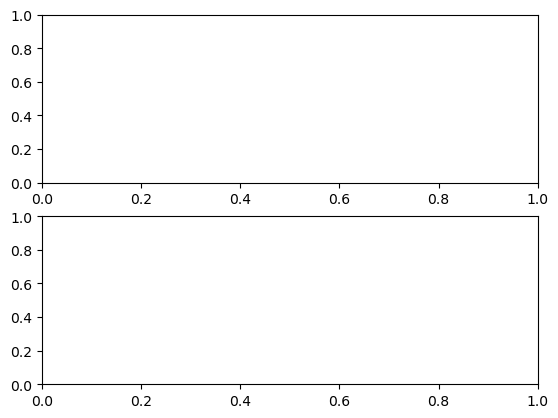

In [42]:
fig, ax =plt.subplots(2)

plt.displot(df, y="caret_weight", kind="ecdf", hue='cut')

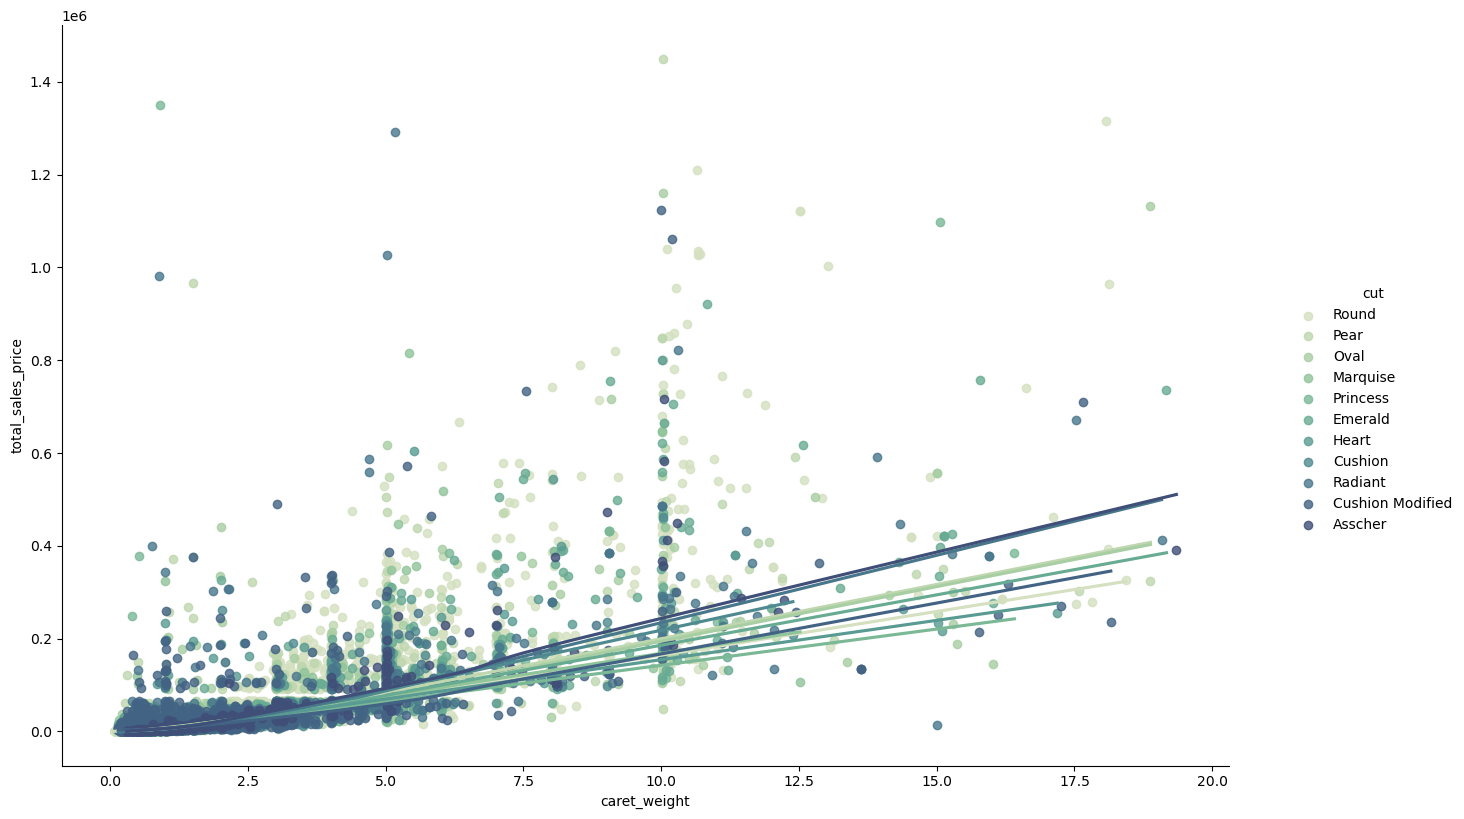

In [18]:
f = sns.lmplot(x="caret_weight", y="total_sales_price", hue="cut", data=df, lowess=True, aspect = 2)
f.figure.set_size_inches(15, 9)

The interesting thing in this chart is how there several vertical lines that represent common carat weight sizes.

To me this says that the industry knows there are certain mental breakpoints

and there is also seems to be a price breakpoint at around $10000 which is even more clear for the chart below.

In [ ]:
g = sns.jointplot(data=df, x="caret_weight", y='total_sales_price', hue="color")
g.figure.set_size_inches(15, 9)

For these two charts on caret weight there are two point I think are of interest.

1) Visually, we can discern from the vertical pricing that the industry provides stones at points that match a certain whole number bias of purchases. 


Just let you know, the pairplot below takes a bit and I don't think it really is very helpful overall. However, it does illustrate a good point so it's worth running at least once.

A lot of charts here look like there they have pretty good correlation. In reality, however, they're colinear. For example, the length, width and depth of diamond is a function of it's caret weight as are things that are derivative like `depth_percent`

In [ ]:
#sns.pairplot(df, hue='cut', height=2.5)

### Combination related questions

I have a few questions and it makes sense to drill down on a couple of them.

1. Are melee sized colored diamonds uncommon? It seems like they would be hard to see.

In [ ]:
colored = df.loc[df['fancy_color_dominant_color'] != 'unknown' ]
sm_colored = colored.loc[df['caret_weight'] <= .2 ].reindex()
sm_colored

10 carat stones are the best case

In [ ]:
ten_car = df.loc[df['caret_weight'] == .2].reindex()
not_rnd_ten_car = ten_car.loc[df['cut'] != 'Round'].reindex()

In [ ]:
sns.displot(data=not_rnd_ten_car, x="total_sales_price", hue="cut")

## EDA - exercises for the reader.

#### Here are few questions that should be pretty easy to answer:

  * Do some cuts command a higher price in general?
  * Are some cuts common at higher caret weights?
  * I read that a 1 carat diamond costs range between [1800 and 12000](https://www.diamonds.pro/education/1-carat-diamond-ring/) dollars. How would that segment? Is the increase in price just a good sales person? Or is there an increase in clarity, color, or another factor that isn't one of the 4Cs?
  

## Here's my hypothesis: Size is the main driver.

Sticking with the Cut, Color, Clarity, and Caret Weight order above ...

**Cut** I think are a matter of preference but we'll see a small effect for very large diamonds. This can be done in a second round of EDA (which I think is continuous if there is continued interest). 

**Color** and **Clarity** I don't think people can discern either of these and in the aggregate they have a smallish effect. While I don't think it can be tested with a model I don't really care about color because they really can't see it easily.  A bad cut condition might have some negative impact but I don't think it will be much because there shouldn't be that many and the others could be concealed by the setting. So, any effect will be more due to a salesperson's patter than purchaser's perception.

**Caret Weight** I feel confident this is the main driver by far.

Also, I'm putting my money on `XGBoost` which, I think, is a another very safe bet.

In [ ]:
# sns.set_theme(style="ticks")

# f, ax = plt.subplots(figsize=(7, 5))
# sns.despine(f)

# sns.histplot(df,
#     x="total_sales_price", hue="caret_weight",
#     multiple="stack",
#     palette="light:m_r",
#     edgecolor=".3",
#     linewidth=.5,
#     log_scale=True,
#     )

# ax.set_xticks([500, 1000, 2000, 5000, 10000])



Notes for next round --

PCA is in order
Run models with outliers removed
Colinearity is obviously in play. Deal with that.

In [ ]:
df.query("cut_quality == 'None'")